In [16]:
import pandas as pd 
import numpy as np
 

In [17]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


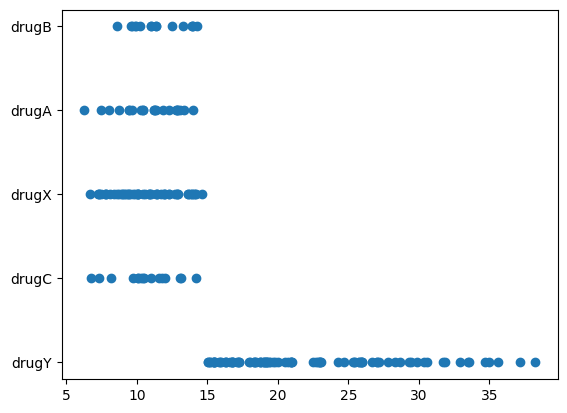

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['Na_to_K'],df['Drug']) 

In [19]:
val_sex = {
    'F':1,
    'M':2
}
df['Sex'] = df['Sex'].map(val_sex)
df['Sex']

0      1
1      2
2      2
3      1
4      1
      ..
195    1
196    2
197    2
198    2
199    1
Name: Sex, Length: 200, dtype: int64

In [20]:
bp_values = {
    'LOW' :0,
    'NORMAL' :1,
    'HIGH':2
}
df['BP']= df['BP'].map(bp_values)
df['BP']

0      2
1      0
2      0
3      1
4      0
      ..
195    0
196    0
197    1
198    1
199    0
Name: BP, Length: 200, dtype: int64

In [21]:
cholestrol_values = {
    'NORMAL': 0,
    'HIGH': 1
}

df['Cholesterol'] = df['Cholesterol'].map(cholestrol_values)
df['Cholesterol']

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    0
Name: Cholesterol, Length: 200, dtype: int64

In [22]:
drug_values = {
    'drugA': 0,
    'drugB': 1,
    'drugC': 2,
    'drugX': 3,
    'drugY': 4
}

df['Drug'] = df['Drug'].map(drug_values)

In [23]:
df['Drug']

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int64

In [24]:
y = df['Drug']
df.drop(['Drug'],axis=1,inplace=True)

In [25]:
y.values

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3], dtype=int64)

In [26]:
meanBycloumn = np.mean(df.T,axis=1)
meanBycloumn

Age            44.315000
Sex             1.520000
BP              1.065000
Cholesterol     0.515000
Na_to_K        16.084485
dtype: float64

In [27]:
scaled_Date = df - meanBycloumn
scaled_Date 

,Age,Sex,BP,Cholesterol,Na_to_K
0,-21.315,-0.52,0.935,0.485,9.270515
1,2.685,0.48,-1.065,0.485,-2.991485
2,2.685,0.48,-1.065,0.485,-5.970485
3,-16.315,-0.52,-0.065,0.485,-8.286485
4,16.685,-0.52,-1.065,0.485,1.958515
...,...,...,...,...,...
195,11.685,-0.52,-1.065,0.485,-4.517485
196,-28.315,0.48,-1.065,0.485,-4.078485
197,7.685,0.48,-0.065,0.485,-6.190485
198,-21.315,0.48,-0.065,-0.515,-2.064485


In [28]:
cov_mat = np.cov(scaled_Date.T)
cov_mat

array([[ 2.73714347e+02,  8.45427136e-01, -1.67886935e+00,
         5.65603015e-01, -7.54375153e+00],
       [ 8.45427136e-01,  2.50854271e-01, -1.88944724e-02,
         2.21105528e-03, -4.52298693e-01],
       [-1.67886935e+00, -1.88944724e-02,  7.04296482e-01,
        -1.35427136e-02,  2.23531131e-01],
       [ 5.65603015e-01,  2.21105528e-03, -1.35427136e-02,
         2.51030151e-01, -3.61957538e-02],
       [-7.54375153e+00, -4.52298693e-01,  2.23531131e-01,
        -3.61957538e-02,  5.21855335e+01]])

In [29]:
from numpy.linalg import eig
eval,evec = eig(cov_mat)
print(eval)
print(evec)

[2.73985211e+02 5.19329552e+01 6.93918132e-01 2.44350085e-01
 2.49626833e-01]
[[ 9.99395580e-01  3.40499564e-02 -6.17414584e-03 -2.68991143e-03
   1.92874810e-03]
 [ 3.14325616e-03 -8.19034363e-03  2.71833243e-02  9.99587383e-01
  -3.02794132e-03]
 [-6.16780346e-03  3.24792012e-03 -9.99351162e-01  2.71544118e-02
  -2.26120130e-02]
 [ 2.06982712e-03 -3.28484169e-04  2.25077500e-02 -3.64968521e-03
  -9.99737810e-01]
 [-3.40039595e-02  9.99381239e-01  3.68835855e-03  8.19423157e-03
  -3.45643571e-04]]


In [30]:
project_date = evec.T.dot(scaled_Date.T)
project_date

array([[-2.16237485e+01,  2.79418081e+00,  2.89547860e+00,
        -1.60235953e+01,  1.66142561e+01, -2.20474780e+01,
         4.67546031e+00, -3.13228053e+00,  1.57094953e+01,
        -1.41884619e+00,  2.83612680e+00, -1.04231386e+01,
        -1.28103255e+00,  2.95078211e+01,  5.79631803e+00,
        -2.82870224e+01,  2.48345122e+01, -1.24562660e+00,
        -2.09942602e+01, -1.26523066e+01,  1.25808529e+01,
         1.83422755e+01,  2.19789179e+00,  3.72436344e+00,
        -1.18939433e+01, -1.64062505e+01, -1.37958345e+01,
         4.90781378e+00, -5.53277094e+00,  6.30198411e-01,
        -2.60519927e+01,  2.98854238e+01,  4.86159637e+00,
         2.01270562e+01,  8.74902236e+00,  1.98404259e+00,
        -1.20871119e+01, -5.23178700e+00, -5.09729532e+00,
        -2.90563237e+01,  2.85607786e+01,  1.37310150e+01,
         5.69242124e+00, -2.11691556e+01,  5.80812182e+00,
         2.19408597e+01, -7.21518585e+00,  2.38767671e+01,
        -2.18297165e+01, -1.64254070e+01,  1.35570463e+0

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_stand = sc.fit_transform(df)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_stand)

In [33]:
pca.explained_variance_ratio_

array([0.25281795, 0.20698312])

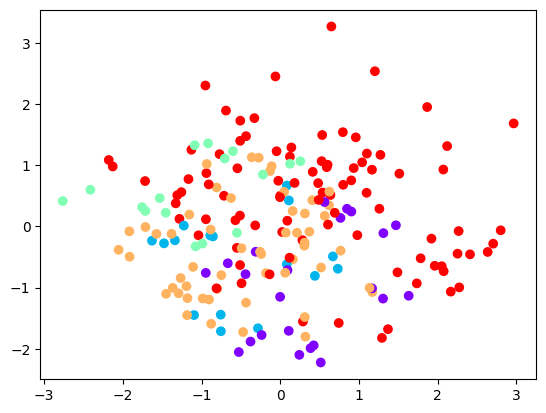

In [34]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=y,cmap='rainbow')